In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Data Preparation and Cleaning (i.e., Data Wrangling )

---

* Illustrating with a use case


### About the Data

---

* The dataset `spending_clean_ex.csv` was specifically constructed from the Medicare dataset
* It was modified to contain interesting cleaning use cases



In [4]:
spending_df = pd.read_csv('https://www.dropbox.com/s/nm0t3tsxi7rj5wj/spending_clean_ex.csv?dl=1', 
                          index_col='unique_id')
spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,$77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,$767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,$5409.29
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,$65.62
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,$8873.7


### Inspecting and Modifying Data Types
---

* Recall that `dtypes` returns data type of each column. 

```python
spending_df.dtypes
doctor_id             int64
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object
```

* Issues: 
  * `doctor_id` is saved as an `int64`
  * `spending` is saved as an `object`


### Inspecting and Modifying Data Types

* We need to cast the entries of each misidentified column to its appropriate `pandas` data type

```python
spending_df['doctor_id'].astype('object')
```

* As is the case with most operations in Pandas, `astype` is not `in-place`
  * We need to manually update the data to make the change permanent by overwriting the column


In [6]:
spending_df['doctor_id'].astype('object')
spending_df.dtypes

doctor_id             int64
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object

### Changing Column Data Type



```python
>>> spending_df.loc['doctor_id'] = spending_df.loc['doctor_id'].astype('object')
>>> spending_df.dtypes
doctor_id            object
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object
```



In [10]:
spending_df['doctor_id'] = spending_df['doctor_id'].astype('object')

spending_df.dtypes

doctor_id            object
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object

### String Methods on Series of type Object

* A series of type `Object` has an accessor that can be used to create a new `str` object of the accessed object
  * ``` spending_df["spending"].str```
 
* The accessor provides various methods that can be applied element-wise on the entries in the `Series `
  * Same methods that are typically on Python String objects
  * Difference is that the elements are applied element-wise; a Series is returned

* String methods are not applied directly to the `Series`, but to the `string` attribute of the Series
 

### String Methods on Series of type Object

![](https://www.dropbox.com/s/uakp93fanxktwh3/str_upper.png?dl=1)

In [18]:
some_series = pd.Series(["Hi ", "There", "how", "are", "you"])
some_series.str.upper()


0      HI 
1    THERE
2      HOW
3      ARE
4      YOU
dtype: object

### Using `replace()` to Fix Column's Data

* We need to remove the `"$"` character
 
  * With `replace()`, we can remove `"$"` by replacing it with the `""` (empty string)

* We need to remove the `","` character (ex. 3,454,420.29 should be 3454420.29)
   * With `replace()`, we can remove `","` by replacing it with the `""` (empty string)


```python 
spending_df["spending"].str.replace("$", "")
```

* Since changes are not permanent, we need to overwrite the data in the column



In [19]:
spending_df.sort_values(by="spending").head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
XI271888,1982785085,INTERNAL MEDICINE,BUDESONIDE/FORMOTEROL FUMARATE,37.0,10253.35
DJ966828,1629022389,NURSE PRACTITIONER,EZETIMIBE,20.0,10869.06
SU660670,1366528028,INTERNAL MEDICINE,LISINOPRIL,25.0,118.89
CQ964168,1174510481,OBSTETRICS/GYNECOLOGY,NYSTATIN/TRIAMCIN,11.0,1219.38
BU202944,1538156542,FAMILY PRACTICE,ALBUTEROL SULFATE,16.0,1456.08


In [20]:
spending_df["spending"] = spending_df["spending"].str.replace("$", "")

spending_df["spending"] = spending_df["spending"].str.replace(",", "")

spending_df["spending"] = spending_df["spending"].astype('float64')

spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.29
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,65.62
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,8873.70


### Combing Multiple String operations

* We can use method chaining to carry out the operation
  * Combines similar functionality in one line
    * Easier to understand an maintain
* Note that we need to call the '`str`' of each resulting `Series`

```python
>>> spending_df["spending"] = (spending_df["spending"]
                               .str.replace("$", "")
                               .str.replace(",", "")
                               .astype("float64"))
```

In [28]:
spending_df["spending"] = (spending_df["spending"]
                           .str.replace("$", "")
                           .str.replace(",", "")
                           .astype("float64"))
spending_df.dtypes

doctor_id             int64
specialty            object
medication           object
nb_beneficiaries    float64
spending            float64
dtype: object

### Question


* Given the `Series` below, Which line of code modfies the `Series` so that each entry matches the string: 'UHManoa'?


```python
>>> UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])
```

| Index |Data |
|:----------|-----------|
| 0 | 'U H Manoa' |
| 1 | 'UH_Manoa' |
| 2 | 'UH Manoa' |
| 3 | 'UH-Manoa' |





A:
```python
(UH_Series
 .str.replace(" ", "")
 .str.replace("_","")
.str.replace("-",""))
```

B: 
```python
UH_Series
 .str.replace("_"," ")
.str.replace("-"," ")
```

C:
```python
UH_Series = UH_Series
 .str.replace(" ", "")
 .str.replace("_","")
.str.replace("-","")
```

D:
```python
UH_Series = UH_Series.replace("_","").replace("-","").replace(" ", "")
```

### Missing Data


* Missing data can complicate analysis or lead to erroneous results

* Missing data can arise for various reasons
  * Human error: data deleted by mistake
  * Partial data collection
    * E.g., the first round of data collection did not record a field (ex. salary) while the second round did
  * Defective instrumentation or intermittent communication problems

* Missing values can be indicated using a sentinel
 Ex. 9999, "UNKNOWN", "N/A", etc...


### Handling Missing Data

* Requires identifying missing values

* Handling missing values is typically done by either: 
  1. Filtering out missing values
  2. Filling in missing values with putative values (imputation)
  

* When to use which is application-specific and data specific
  * Can you afford to throw away data?
  * Is there an easy way to fill in, i.e., impute, missing values?
    * Use default value for instance (ex. mean for that feature if numeric value)
    * Use a statistical model 


### Identifying Missing Values 

* Missing value can occur in the data as:

* Empty fields indicating that the value is missing
    * `pandas` denotes missing values with `NaN`
        * Automatically set if the value is `empty` in the data file

  * NaN available in `numpy` is represented as a float that is not equal to any other number
    * `np.Nan != np.NaN`
  
  
  
* Sentinel values
  * Sentinels are typically dummy data that is added convenience to identify that a value is missing 
  * ex. replacing zip code with 999999 or salary with 0 or negative value (ex. -1) 
  


### Identifying Missing Values - cont'd

* Identifying missing values is critical for appropriately modeling the data

* Leaving sentinel value in can skew the data
  * Ex. computing mean salary if data contains sentinel value will skew the mean


* Leavin `nan` values can lead to `nan` as a result
  - Ex. Replace all the occurrences of  9999 with `np.nan`

    



In [20]:
np.nan == np.nan

False

In [24]:
x = pd.Series([10, np.NaN, 4])
x

0    10.0
1     NaN
2     4.0
dtype: float64

In [26]:
_sum = sum(x)
_mean = np.mean(x) # did not work in previous versions :(
nanmean = np.nanmean(x) # did not work in previous versions :(

# different ways of printing  

print("The sum is {}".format(_sum))
print(f"The mean is {_mean}")
print("The nanmean is %s" % (nanmean))


The sum is nan
The mean is 7.0
The nanmean is 7.0


### Identifying Missing Values - cont'd


- We can use the `isnull()` or `isna()` methods on a `Series` or `DataFrame` to identify missing valaues
  - The method returns `True` if value is `NaN` and `False` otherwise
  
```python
spending_df.isnull().head(n=4)
           doctor_id  specialty  medication  nb_beneficiaries  spending
unique_id                                                              
BK982218       False      False       False             False     False
CG916968       False      False       False             False     False
SA964720       False      False       False             False     False
TR390895       False       True       False             False     False
```



### Counting Missing Values


* You can count the number of missing values by using the counting the number of `True` and `False` values 
  * Recall that Python encodes `True` as $1$ and `False` as $0$  
  * use `sum` to count the number of `0`s and `1`s


```python
spending_df["spending"].isnull().sum()
```

* You can achieve the same by subtracting the result of `count()` (Returns the number of non-NA/null) method from the result of the `size` attribute (dim., including missing values)

```python
spending_df["spending"].size - spending_df["spending"].count()
```



### Changing Column Data Type

* Converting as we did above can only be done is the data in the column is compatible with the type
 * We mentioned that we cannot convert a column that contains last names into `float64` (number with decimal points)
 * Similarly, we cannot convert a column that contains a NaN to integer (recall that NaN is float)
 * Converting a column that contains a NaN to str results in `NaN` becoming the string `"nan"`
 
 


In [46]:
x = pd.DataFrame([[1, "10"],[2,np.NaN],[3,"4"]])
x[1].astype('float64')

0    10.0
1     NaN
2     4.0
Name: 1, dtype: float64

In [58]:
x = pd.DataFrame([[1, 10],[2,np.NaN],[3,4]])
y = x[1].astype('str')
print(y[1])
type(y[1])

nan


str

### Changing Column Data Type

* `nb_beneficiaries` cannot readily be converted to `float64` 

```python
spending_df['nb_beneficiaries'] = spending_df['nb_beneficiaries'].astype('int64')
...
ValueError: cannot convert float NaN to integer
```

* Pandas cannot convert `NaN` to `int`
    * We need to first handle the missing value before converting

### Filtering Missing Values

* The trivial way to handle missing values is by dropping entries that contain them


* Judgement call as to whether this can bias your analysis
  * For instance, removing 5 instances out of 1M that have missing values should not be a problem.
  * However, if all males have salary value missing. Removing all males data will bias your market segmentation model
    
* Can be carried out using subsetting or the  `dropna()` method 


### Filtering Missing Values

* You **can** subset using a `Boolean` `Series`
  * We previously saw how to subset using a list of indices and labels


```python
null_entries = spending_df["spending"].isnull()
not_null_entries = ~ null_entries
spending_no_na_df = spending_df[not_null_entries]
```

#### Or simply

```python
spending_no_na_df = spending_df[ ~ spending_df["spending"].isnull()]
```

* The index needs to have the same firs dimension as the object it is indexing

In [68]:
data = pd.DataFrame({"A":[1, 2, 3, 4, 5, 6], "B":[10, 2, 5, 7, np.NaN, 19]})
data


,A,B
0,1,10.0
1,2,2.0
2,3,5.0
3,4,7.0
4,5,NaN
5,6,19.0


In [73]:
is_null_values = data["B"].isnull()
is_null_values


0    False
1    False
2    False
3    False
4     True
5    False
Name: B, dtype: bool

In [74]:
data[~is_null_values]

,A,B
0,1,10.0
1,2,2.0
2,3,5.0
3,4,7.0
5,6,19.0


In [53]:
some_data = pd.Series([1,2,3,4,5,6,])
some_data % 2 == 0 

0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool

In [57]:
some_data = pd.Series([1,2,3,4,5,6,])

is_even = some_data % 2 ==0 

print("is_even")
print(is_even)

print("~ is_even")
print(~ is_even)

is_even
0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool
~ is_even
0     True
1    False
2     True
3    False
4     True
5    False
dtype: bool


In [58]:
some_data = pd.Series([1,2,3,4,5,6,])
is_even = some_data % 2 ==0 
some_data[is_even]

1    2
3    4
5    6
dtype: int64

In [59]:
some_data = pd.Series([1,2,3,4,5,6,])
is_even = some_data % 2 ==0 

some_data[~is_even]

0    1
2    3
4    5
dtype: int64

In [61]:
spending_df.shape

(54, 5)

In [60]:
null_entries = spending_df["spending"].isnull()
not_null_entries = ~ null_entries
spending_no_na_df = spending_df[not_null_entries]

spending_no_na_df.shape


(50, 5)

### Filtering `NaN` using the `dropna()` method 

* Considers, by default, all the columns
  * Can consider a subset of columns

* The method can be used to drop either lines or columns using `axis`

<img src="https://www.dropbox.com/s/g2ousnl00zddhrr/axis_drop.png?dl=1" alt="drawing" style="width:500px;"/>




In [30]:
test_df = pd.DataFrame({"X": [1,2,3,4], "Y": ['A', 'E', 'C', np.nan]})
test_df

,X,Y
0,1,A
1,2,E
2,3,C
3,4,NaN


In [31]:
test_df.dropna()

,X,Y
0,1,A
1,2,E
2,3,C


In [32]:
test_df.dropna(axis=1)

,X
0,1
1,2
2,3
3,4


In [40]:
# This is when small test cases are useful

test_df.dropna(axis=0, subset=["X"])

,X,Y
0,1,A
1,2,E
2,3,C
3,4,NaN


In [41]:
test_df.dropna(axis=0, subset=["Y"])

,X,Y
0,1,A
1,2,E
2,3,C


### Filling Missing Values

* Filling missing values is often referred to as missing value *imputation*, or simply imputation

* When data is scarce, being able to impute missing values is critical

* Two high-level strategies for imputing data: 

    1. Filling the value with a representative constant

    2. Filling the value dynamically
      * How many cars went through the University ave's H1 exit this Wednesday?
        * Probably close to the same number as last Wednesday
      * what was the temperature reported by a sensor at 2PM
         * An average of the temperatures at times 1:55PM and 2:05PM is probably a good estimate.

* Both approaches can be carried out using `fillna()`


### Filling Continued: `fillna()` with Static Values 

* Use a scalar constant to replace all missing values
* Use a dictionary with specific values for each column. 

```python
>>> filled_spending_df = spending_df.fillna(0)
```

 

```python
>>> filled_spending_df = spending_df.fillna( { "specialty": "UNKNOWN", 
                              "nb_beneficiaries": 0, 
                              "spending": 0 } )
```


### `fillna()` with Dynamically Computed Values - Cont'd

* Dynamic value imputation refers to filling the missing entries with a value that depends on the existing data

* Many different approaches for doing this
  * Ex. replace a value with the column's mean? 


```python
>>> average_spending = spending_df["spending"].mean()
>>> average_nb_beneficiaries = spending_df["nb_beneficiaries"].mean()
>>> filled_spending_df = spending_df.fillna({"nb_beneficiaries": average_nb_beneficiaries , 
                      "spending": average_spending})
```



### `fillna()` with Dynamic Values for Time Series -- Cont'd

*  `fillna()` has a `method` parameter that can be modified to either:
  * back fill, `method='bfill'`
    * Fill a missing value with the non-missing value that came before it
  * forward fill, `method=ffill`
    * Fill a missing value with the non-missing value that comes after it

* Another stratgy is to just avg. the the previous and next values


### `fillna()` with Dynamic Values -- Cont'd

* Dozens of possible stratgies.
  * We will see regression as a simple model to impute missing values
  * More sophisticated machine learning models can be used.

* When instances (entries) are similar, a good stratgy is to just copy value from previous or next instnace

  * Alternaitvely, we can average based on `k-nearest` neighbors


* You can come up with your own model (logic) and apply it using iteratively

  * Part of assignment `1`

In [42]:
complete_data = pd.Series([10, 20, 20, 30, 30, 40, 30, 20, 10, 10, 20, 10, 10, 20, 35, 40, 50, 50, 50, 50, 60])
test_df = pd.Series([10, 20, 20, 30, np.NaN, 40, 30, 20, 10, 10, 20, 10, 10, np.NaN, 35, 40, 50, 50, 50, 50, 60])
data = pd.DataFrame({"Complete": complete_data, "test_df":test_df})

data


,Complete,test_df
0,10,10.0
1,20,20.0
2,20,20.0
3,30,30.0
4,30,NaN
5,40,40.0
6,30,30.0
7,20,20.0
8,10,10.0
9,10,10.0


In [119]:
ffilled_data = data.fillna(method='ffill')
ffilled_data


,Complete,test_df
0,10,10.0
1,20,20.0
2,20,20.0
3,30,30.0
4,30,30.0
5,40,40.0
6,30,30.0
7,20,20.0
8,10,10.0
9,10,10.0


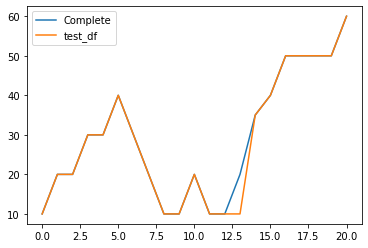

In [120]:
ffilled_data.plot()

In [121]:
bfilled_data = data.fillna(method='bfill')
bfilled_data

,Complete,test_df
0,10,10.0
1,20,20.0
2,20,20.0
3,30,30.0
4,30,40.0
5,40,40.0
6,30,30.0
7,20,20.0
8,10,10.0
9,10,10.0


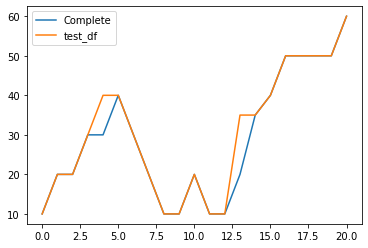

In [122]:
bfilled_data.plot()


In [29]:
### Skip this
t = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

def is_even(x):
    return x%2 == 0 
    
    
s = t.where(is_even, -1)
s

0     -1
1      2
2     -1
3      4
4     -1
5      6
6     -1
7      8
8     -1
9     10
10    -1
dtype: int64